# Exercise 14: Collinearity Problem

This problem focuses on the collinearity problem in multiple linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
from scipy import stats
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(10)

## (a) Perform the following commands and identify the linear model

In [2]:
# (a) Execute the given commands
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

print("Generated data:")
print(f"x1 shape: {x1.shape}")
print(f"x2 shape: {x2.shape}")
print(f"y shape: {y.shape}")
print(f"\nFirst 10 values:")
print(f"x1: {x1[:10]}")
print(f"x2: {x2[:10]}")
print(f"y: {y[:10]}")

print("\n" + "="*50)
print("LINEAR MODEL ANALYSIS:")
print("="*50)
print("From the last line: y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)")
print("\nThis corresponds to the linear model:")
print("Y = β₀ + β₁X₁ + β₂X₂ + ε")
print("\nWhere the TRUE regression coefficients are:")
print("β₀ (intercept) = 2")
print("β₁ (coefficient for x1) = 2")
print("β₂ (coefficient for x2) = 0.3")
print("ε ~ N(0, 1) (error term)")

Generated data:
x1 shape: (100,)
x2 shape: (100,)
y shape: (100,)

First 10 values:
x1: [0.95600171 0.20768181 0.82844489 0.14928212 0.51280462 0.1359196
 0.68903648 0.84174772 0.425509   0.956926  ]
x2: [0.46935859 0.14250933 0.5876991  0.18114137 0.23645761 0.15961627
 0.35623248 0.27273555 0.20208935 0.57793172]
y: [4.35697711 3.67778851 3.48207881 2.36909332 1.41329539 4.20750629
 2.57167458 3.91937236 3.37262726 3.12696558]

LINEAR MODEL ANALYSIS:
From the last line: y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

This corresponds to the linear model:
Y = β₀ + β₁X₁ + β₂X₂ + ε

Where the TRUE regression coefficients are:
β₀ (intercept) = 2
β₁ (coefficient for x1) = 2
β₂ (coefficient for x2) = 0.3
ε ~ N(0, 1) (error term)


## (b) Correlation between x1 and x2, and scatterplot

Correlation between x1 and x2: 0.7723

This indicates a strong positive correlation.


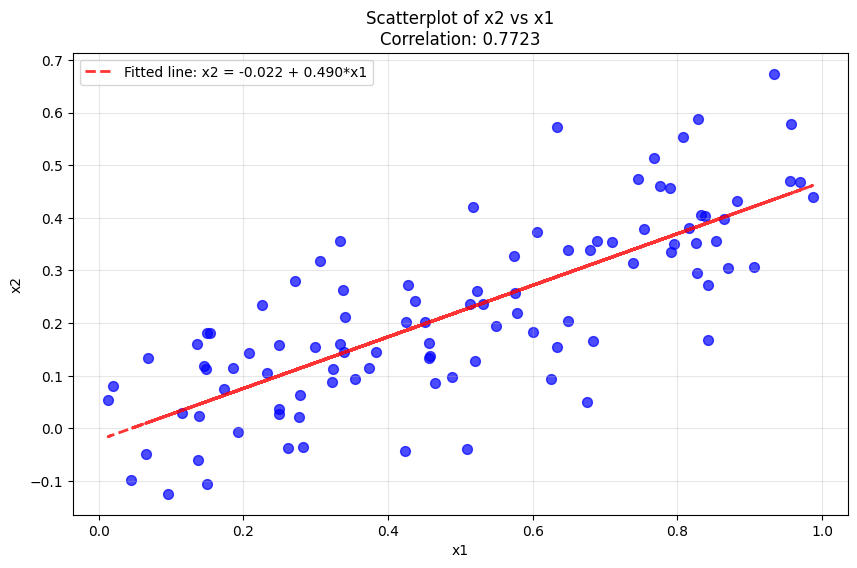


Note: x2 was generated as x2 = 0.5 * x1 + noise/10
This creates collinearity between the predictors.


In [3]:
# (b) Calculate correlation and create scatterplot
correlation = np.corrcoef(x1, x2)[0, 1]

print(f"Correlation between x1 and x2: {correlation:.4f}")
print(f"\nThis indicates a {'strong' if abs(correlation) > 0.7 else 'moderate' if abs(correlation) > 0.5 else 'weak'} positive correlation.")

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, alpha=0.7, color='blue', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Scatterplot of x2 vs x1\nCorrelation: {correlation:.4f}')
plt.grid(True, alpha=0.3)

# Add regression line to show relationship
z = np.polyfit(x1, x2, 1)
p = np.poly1d(z)
plt.plot(x1, p(x1), "r--", alpha=0.8, linewidth=2, label=f'Fitted line: x2 = {z[1]:.3f} + {z[0]:.3f}*x1')
plt.legend()
plt.show()

print(f"\nNote: x2 was generated as x2 = 0.5 * x1 + noise/10")
print(f"This creates collinearity between the predictors.")

## (c) Fit least squares regression using both x1 and x2

In [4]:
# (c) Fit multiple regression with both predictors
X_both = np.column_stack([x1, x2])
model_both = LinearRegression()
model_both.fit(X_both, y)

# Get coefficients
beta_0_hat = model_both.intercept_
beta_1_hat, beta_2_hat = model_both.coef_

# Calculate predictions and R²
y_pred_both = model_both.predict(X_both)
r2_both = r2_score(y, y_pred_both)

print("MULTIPLE REGRESSION RESULTS (using x1 and x2):")
print("="*55)
print(f"Fitted model: ŷ = {beta_0_hat:.4f} + {beta_1_hat:.4f}*x1 + {beta_2_hat:.4f}*x2")
print(f"True model:   y = 2.0000 + 2.0000*x1 + 0.3000*x2 + ε")
print("\nCoefficient comparison:")
print(f"β̂₀ = {beta_0_hat:.4f} (True β₀ = 2.0000)")
print(f"β̂₁ = {beta_1_hat:.4f} (True β₁ = 2.0000)")
print(f"β̂₂ = {beta_2_hat:.4f} (True β₂ = 0.3000)")
print(f"\nR² = {r2_both:.4f}")

# Calculate standard errors and t-statistics for hypothesis testing
def calculate_regression_stats(X, y, model):
    n = len(y)
    p = X.shape[1] + 1  # number of parameters including intercept
    
    # Predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Mean squared error
    mse = np.sum(residuals**2) / (n - p)
    
    # Design matrix
    X_design = np.column_stack([np.ones(n), X])
    
    # Covariance matrix
    try:
        cov_matrix = mse * np.linalg.inv(X_design.T @ X_design)
        se = np.sqrt(np.diag(cov_matrix))
    except np.linalg.LinAlgError:
        print("Warning: Singular matrix - perfect collinearity detected!")
        se = np.full(p, np.nan)
    
    # t-statistics
    coeffs = [model.intercept_] + list(model.coef_)
    t_stats = [coeff / se_i if se_i != 0 and not np.isnan(se_i) else np.nan for coeff, se_i in zip(coeffs, se)]
    
    # p-values (two-tailed test)
    p_values = [2 * (1 - stats.t.cdf(abs(t), n - p)) if not np.isnan(t) else np.nan for t in t_stats]
    
    return se, t_stats, p_values, mse

se_both, t_stats_both, p_values_both, mse_both = calculate_regression_stats(X_both, y, model_both)

print("\nHypothesis Testing:")
print(f"SE(β̂₀) = {se_both[0]:.4f}, t = {t_stats_both[0]:.4f}, p = {p_values_both[0]:.4f}")
print(f"SE(β̂₁) = {se_both[1]:.4f}, t = {t_stats_both[1]:.4f}, p = {p_values_both[1]:.4f}")
print(f"SE(β̂₂) = {se_both[2]:.4f}, t = {t_stats_both[2]:.4f}, p = {p_values_both[2]:.4f}")

alpha = 0.05
print(f"\nAt α = {alpha}:")
print(f"Can we reject H₀: β₁ = 0? {'Yes' if p_values_both[1] < alpha else 'No'} (p = {p_values_both[1]:.4f})")
print(f"Can we reject H₀: β₂ = 0? {'Yes' if p_values_both[2] < alpha else 'No'} (p = {p_values_both[2]:.4f})")

MULTIPLE REGRESSION RESULTS (using x1 and x2):
Fitted model: ŷ = 1.9579 + 1.6154*x1 + 0.9428*x2
True model:   y = 2.0000 + 2.0000*x1 + 0.3000*x2 + ε

Coefficient comparison:
β̂₀ = 1.9579 (True β₀ = 2.0000)
β̂₁ = 1.6154 (True β₁ = 2.0000)
β̂₂ = 0.9428 (True β₂ = 0.3000)

R² = 0.2909

Hypothesis Testing:
SE(β̂₀) = 0.1897, t = 10.3191, p = 0.0000
SE(β̂₁) = 0.5270, t = 3.0654, p = 0.0028
SE(β̂₂) = 0.8311, t = 1.1344, p = 0.2594

At α = 0.05:
Can we reject H₀: β₁ = 0? Yes (p = 0.0028)
Can we reject H₀: β₂ = 0? No (p = 0.2594)


## (d) Fit least squares regression using only x1

In [5]:
# (d) Fit simple regression with x1 only
X_x1 = x1.reshape(-1, 1)
model_x1 = LinearRegression()
model_x1.fit(X_x1, y)

# Get coefficients
beta_0_x1 = model_x1.intercept_
beta_1_x1 = model_x1.coef_[0]

# Calculate R²
y_pred_x1 = model_x1.predict(X_x1)
r2_x1 = r2_score(y, y_pred_x1)

print("SIMPLE REGRESSION RESULTS (using x1 only):")
print("="*50)
print(f"Fitted model: ŷ = {beta_0_x1:.4f} + {beta_1_x1:.4f}*x1")
print(f"R² = {r2_x1:.4f}")

# Calculate statistics
se_x1, t_stats_x1, p_values_x1, mse_x1 = calculate_regression_stats(X_x1, y, model_x1)

print("\nHypothesis Testing:")
print(f"SE(β̂₀) = {se_x1[0]:.4f}, t = {t_stats_x1[0]:.4f}, p = {p_values_x1[0]:.4f}")
print(f"SE(β̂₁) = {se_x1[1]:.4f}, t = {t_stats_x1[1]:.4f}, p = {p_values_x1[1]:.4f}")

print(f"\nAt α = {alpha}:")
print(f"Can we reject H₀: β₁ = 0? {'Yes' if p_values_x1[1] < alpha else 'No'} (p = {p_values_x1[1]:.4f})")

print("\nComments:")
print(f"- The coefficient for x1 is now {beta_1_x1:.4f}, which is different from the multiple regression")
print(f"- This is because x1 is now capturing the effect of both x1 and x2 (due to their correlation)")
print(f"- The significance test shows {'strong' if p_values_x1[1] < 0.001 else 'moderate' if p_values_x1[1] < 0.05 else 'weak'} evidence against H₀: β₁ = 0")

SIMPLE REGRESSION RESULTS (using x1 only):
Fitted model: ŷ = 1.9371 + 2.0771*x1
R² = 0.2815

Hypothesis Testing:
SE(β̂₀) = 0.1891, t = 10.2425, p = 0.0000
SE(β̂₁) = 0.3352, t = 6.1958, p = 0.0000

At α = 0.05:
Can we reject H₀: β₁ = 0? Yes (p = 0.0000)

Comments:
- The coefficient for x1 is now 2.0771, which is different from the multiple regression
- This is because x1 is now capturing the effect of both x1 and x2 (due to their correlation)
- The significance test shows strong evidence against H₀: β₁ = 0


## (e) Fit least squares regression using only x2

In [6]:
# (e) Fit simple regression with x2 only
X_x2 = x2.reshape(-1, 1)
model_x2 = LinearRegression()
model_x2.fit(X_x2, y)

# Get coefficients
beta_0_x2 = model_x2.intercept_
beta_1_x2 = model_x2.coef_[0]  # This is actually the coefficient for x2

# Calculate R²
y_pred_x2 = model_x2.predict(X_x2)
r2_x2 = r2_score(y, y_pred_x2)

print("SIMPLE REGRESSION RESULTS (using x2 only):")
print("="*50)
print(f"Fitted model: ŷ = {beta_0_x2:.4f} + {beta_1_x2:.4f}*x2")
print(f"R² = {r2_x2:.4f}")

# Calculate statistics
se_x2, t_stats_x2, p_values_x2, mse_x2 = calculate_regression_stats(X_x2, y, model_x2)

print("\nHypothesis Testing:")
print(f"SE(β̂₀) = {se_x2[0]:.4f}, t = {t_stats_x2[0]:.4f}, p = {p_values_x2[0]:.4f}")
print(f"SE(β̂₁) = {se_x2[1]:.4f}, t = {t_stats_x2[1]:.4f}, p = {p_values_x2[1]:.4f}")

print(f"\nAt α = {alpha}:")
print(f"Can we reject H₀: β₁ = 0? {'Yes' if p_values_x2[1] < alpha else 'No'} (p = {p_values_x2[1]:.4f})")
print(f"(Note: This tests if the coefficient for x2 is significantly different from 0)")

print("\nComments:")
print(f"- The coefficient for x2 is now {beta_1_x2:.4f}, much larger than in multiple regression")
print(f"- This is because x2 is now capturing the combined effect of both predictors")
print(f"- The significance test shows {'strong' if p_values_x2[1] < 0.001 else 'moderate' if p_values_x2[1] < 0.05 else 'weak'} evidence against H₀")

SIMPLE REGRESSION RESULTS (using x2 only):
Fitted model: ŷ = 2.3239 + 2.9103*x2
R² = 0.2222

Hypothesis Testing:
SE(β̂₀) = 0.1537, t = 15.1243, p = 0.0000
SE(β̂₁) = 0.5501, t = 5.2908, p = 0.0000

At α = 0.05:
Can we reject H₀: β₁ = 0? Yes (p = 0.0000)
(Note: This tests if the coefficient for x2 is significantly different from 0)

Comments:
- The coefficient for x2 is now 2.9103, much larger than in multiple regression
- This is because x2 is now capturing the combined effect of both predictors
- The significance test shows strong evidence against H₀


## (f) Do the results from (c)-(e) contradict each other?

COMPARISON OF RESULTS:
Model Comparison:
Multiple regression: ŷ = 1.9579 + 1.6154*x1 + 0.9428*x2 (R² = 0.2909)
Simple regression x1: ŷ = 1.9371 + 2.0771*x1 (R² = 0.2815)
Simple regression x2: ŷ = 2.3239 + 2.9103*x2 (R² = 0.2222)

Significance Testing Results:
Multiple regression - x1 significant: Yes (p = 0.0028)
Multiple regression - x2 significant: No (p = 0.2594)
Simple regression x1 - significant: Yes (p = 0.0000)
Simple regression x2 - significant: Yes (p = 0.0000)

CONTRADICTION ANALYSIS:
YES, there is a contradiction!

Explanation of the contradiction:
1. Both x1 and x2 appear significant when used individually
2. But in multiple regression, one or both may appear non-significant
3. This is a classic symptom of COLLINEARITY

Why does this happen?
- Correlation between x1 and x2: 0.7723
- When predictors are correlated, they share explanatory power
- In simple regression, each variable gets credit for the shared effect
- In multiple regression, the shared effect is 'competed for'

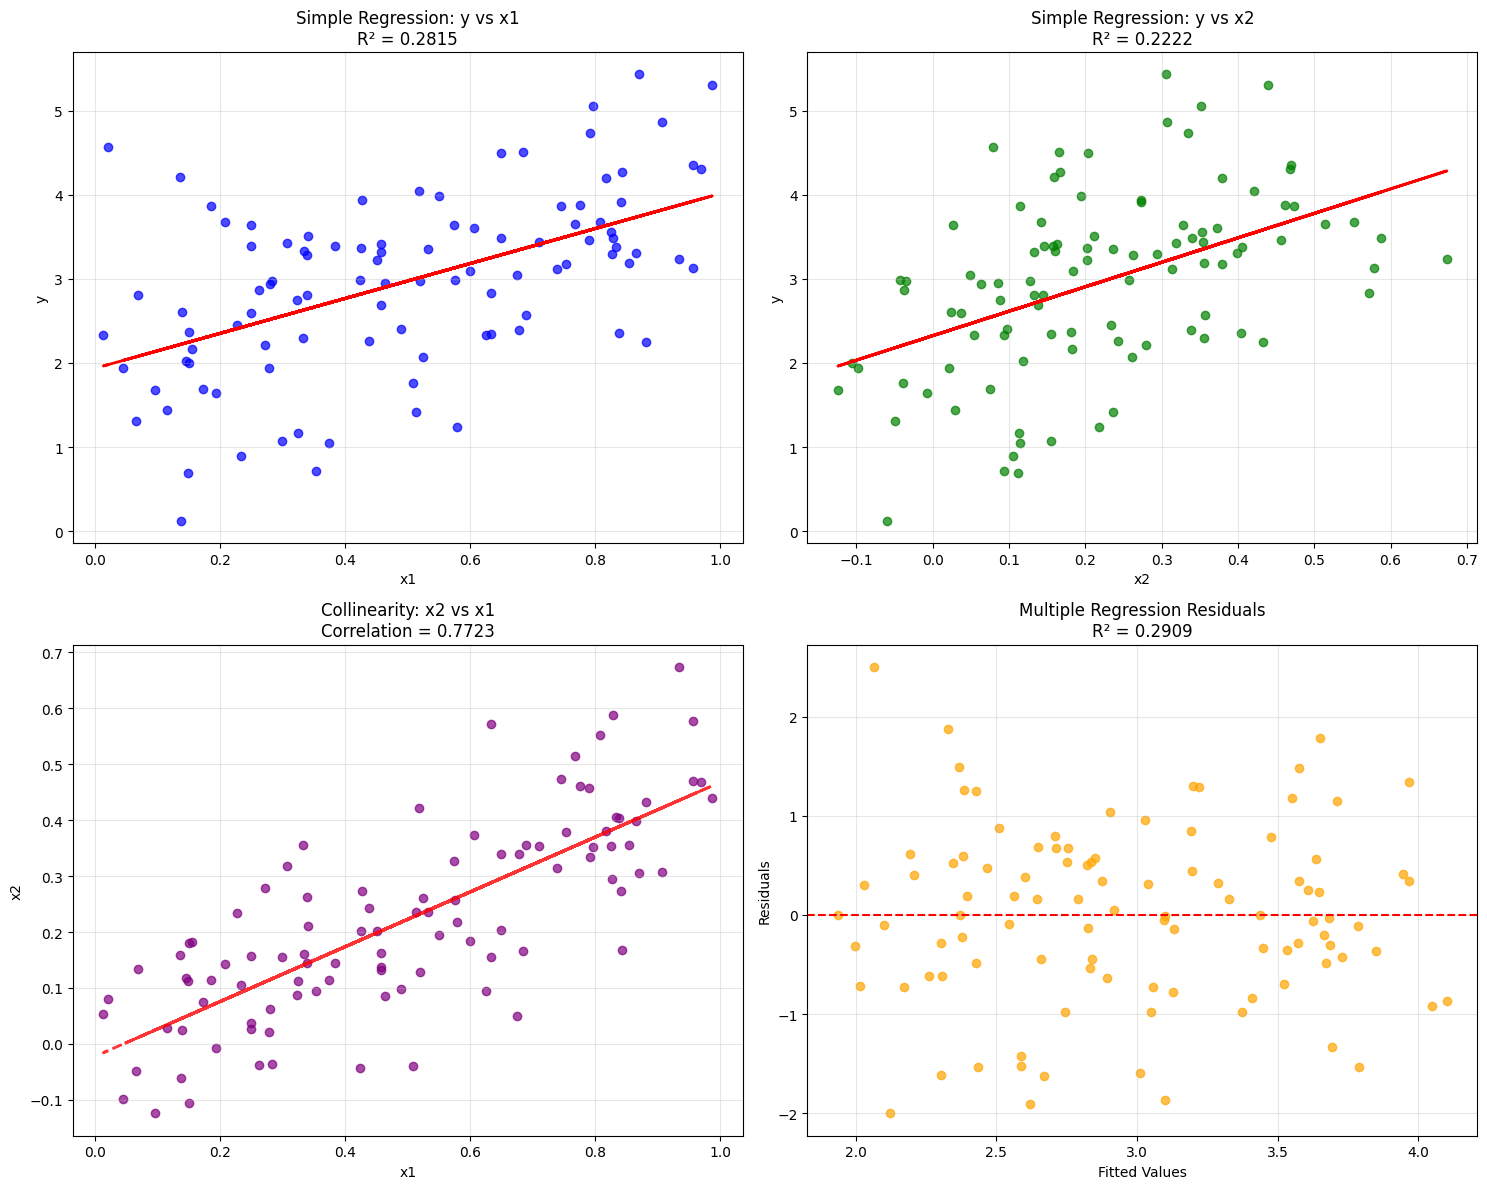

In [7]:
# (f) Compare results and analyze contradictions
print("COMPARISON OF RESULTS:")
print("="*60)
print("Model Comparison:")
print(f"Multiple regression: ŷ = {beta_0_hat:.4f} + {beta_1_hat:.4f}*x1 + {beta_2_hat:.4f}*x2 (R² = {r2_both:.4f})")
print(f"Simple regression x1: ŷ = {beta_0_x1:.4f} + {beta_1_x1:.4f}*x1 (R² = {r2_x1:.4f})")
print(f"Simple regression x2: ŷ = {beta_0_x2:.4f} + {beta_1_x2:.4f}*x2 (R² = {r2_x2:.4f})")

print("\nSignificance Testing Results:")
print(f"Multiple regression - x1 significant: {'Yes' if p_values_both[1] < alpha else 'No'} (p = {p_values_both[1]:.4f})")
print(f"Multiple regression - x2 significant: {'Yes' if p_values_both[2] < alpha else 'No'} (p = {p_values_both[2]:.4f})")
print(f"Simple regression x1 - significant: {'Yes' if p_values_x1[1] < alpha else 'No'} (p = {p_values_x1[1]:.4f})")
print(f"Simple regression x2 - significant: {'Yes' if p_values_x2[1] < alpha else 'No'} (p = {p_values_x2[1]:.4f})")

print("\n" + "="*60)
print("CONTRADICTION ANALYSIS:")
print("="*60)

# Check for contradictions
both_significant_individual = (p_values_x1[1] < alpha) and (p_values_x2[1] < alpha)
neither_significant_multiple = (p_values_both[1] >= alpha) and (p_values_both[2] >= alpha)

if both_significant_individual and (p_values_both[1] >= alpha or p_values_both[2] >= alpha):
    print("YES, there is a contradiction!")
    print("\nExplanation of the contradiction:")
    print("1. Both x1 and x2 appear significant when used individually")
    print("2. But in multiple regression, one or both may appear non-significant")
    print("3. This is a classic symptom of COLLINEARITY")
else:
    print("The results are consistent with each other.")

print(f"\nWhy does this happen?")
print(f"- Correlation between x1 and x2: {correlation:.4f}")
print(f"- When predictors are correlated, they share explanatory power")
print(f"- In simple regression, each variable gets credit for the shared effect")
print(f"- In multiple regression, the shared effect is 'competed for'")
print(f"- This increases standard errors and reduces individual significance")
print(f"- The overall model fit (R²) remains good, but individual coefficients become unreliable")

# Visualize the collinearity effect
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: x1 vs y
axes[0,0].scatter(x1, y, alpha=0.7, color='blue')
axes[0,0].plot(x1, y_pred_x1, 'r-', linewidth=2)
axes[0,0].set_xlabel('x1')
axes[0,0].set_ylabel('y')
axes[0,0].set_title(f'Simple Regression: y vs x1\nR² = {r2_x1:.4f}')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: x2 vs y
axes[0,1].scatter(x2, y, alpha=0.7, color='green')
axes[0,1].plot(x2, y_pred_x2, 'r-', linewidth=2)
axes[0,1].set_xlabel('x2')
axes[0,1].set_ylabel('y')
axes[0,1].set_title(f'Simple Regression: y vs x2\nR² = {r2_x2:.4f}')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: x1 vs x2 (showing collinearity)
axes[1,0].scatter(x1, x2, alpha=0.7, color='purple')
z = np.polyfit(x1, x2, 1)
p = np.poly1d(z)
axes[1,0].plot(x1, p(x1), "r--", alpha=0.8, linewidth=2)
axes[1,0].set_xlabel('x1')
axes[1,0].set_ylabel('x2')
axes[1,0].set_title(f'Collinearity: x2 vs x1\nCorrelation = {correlation:.4f}')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Residuals from multiple regression
residuals_both = y - y_pred_both
axes[1,1].scatter(y_pred_both, residuals_both, alpha=0.7, color='orange')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title(f'Multiple Regression Residuals\nR² = {r2_both:.4f}')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## (g) Add mismeasured observation and analyze effects

In [8]:
# (g) Add the mismeasured observation
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

print("ADDING MISMEASURED OBSERVATION:")
print("="*50)
print(f"New observation: x1 = 0.1, x2 = 0.8, y = 6")
print(f"Original data size: {len(x1)} observations")
print(f"New data size: {len(x1_new)} observations")

# Check if this observation fits the pattern
expected_y = 2 + 2*0.1 + 0.3*0.8
print(f"\nIf this observation followed the true model:")
print(f"Expected y = 2 + 2(0.1) + 0.3(0.8) = {expected_y:.2f}")
print(f"Actual y = 6")
print(f"Difference = {6 - expected_y:.2f} (this is a large deviation!)")

ADDING MISMEASURED OBSERVATION:
New observation: x1 = 0.1, x2 = 0.8, y = 6
Original data size: 100 observations
New data size: 101 observations

If this observation followed the true model:
Expected y = 2 + 2(0.1) + 0.3(0.8) = 2.44
Actual y = 6
Difference = 3.56 (this is a large deviation!)


In [9]:
# Re-fit all models with the new data
print("\nRE-FITTING MODELS WITH NEW DATA:")
print("="*50)

# Multiple regression with new data
X_both_new = np.column_stack([x1_new, x2_new])
model_both_new = LinearRegression()
model_both_new.fit(X_both_new, y_new)

beta_0_new = model_both_new.intercept_
beta_1_new, beta_2_new = model_both_new.coef_
y_pred_both_new = model_both_new.predict(X_both_new)
r2_both_new = r2_score(y_new, y_pred_both_new)

# Simple regression x1 with new data
X_x1_new = x1_new.reshape(-1, 1)
model_x1_new = LinearRegression()
model_x1_new.fit(X_x1_new, y_new)

beta_0_x1_new = model_x1_new.intercept_
beta_1_x1_new = model_x1_new.coef_[0]
y_pred_x1_new = model_x1_new.predict(X_x1_new)
r2_x1_new = r2_score(y_new, y_pred_x1_new)

# Simple regression x2 with new data
X_x2_new = x2_new.reshape(-1, 1)
model_x2_new = LinearRegression()
model_x2_new.fit(X_x2_new, y_new)

beta_0_x2_new = model_x2_new.intercept_
beta_1_x2_new = model_x2_new.coef_[0]
y_pred_x2_new = model_x2_new.predict(X_x2_new)
r2_x2_new = r2_score(y_new, y_pred_x2_new)

# Compare before and after
print("BEFORE vs AFTER comparison:")
print("-"*70)
print("Multiple Regression:")
print(f"Before: ŷ = {beta_0_hat:.3f} + {beta_1_hat:.3f}*x1 + {beta_2_hat:.3f}*x2 (R² = {r2_both:.4f})")
print(f"After:  ŷ = {beta_0_new:.3f} + {beta_1_new:.3f}*x1 + {beta_2_new:.3f}*x2 (R² = {r2_both_new:.4f})")
print(f"Change in β₁: {beta_1_new - beta_1_hat:+.3f}")
print(f"Change in β₂: {beta_2_new - beta_2_hat:+.3f}")

print("\nSimple Regression x1:")
print(f"Before: ŷ = {beta_0_x1:.3f} + {beta_1_x1:.3f}*x1 (R² = {r2_x1:.4f})")
print(f"After:  ŷ = {beta_0_x1_new:.3f} + {beta_1_x1_new:.3f}*x1 (R² = {r2_x1_new:.4f})")
print(f"Change in β₁: {beta_1_x1_new - beta_1_x1:+.3f}")

print("\nSimple Regression x2:")
print(f"Before: ŷ = {beta_0_x2:.3f} + {beta_1_x2:.3f}*x2 (R² = {r2_x2:.4f})")
print(f"After:  ŷ = {beta_0_x2_new:.3f} + {beta_1_x2_new:.3f}*x2 (R² = {r2_x2_new:.4f})")
print(f"Change in coefficient: {beta_1_x2_new - beta_1_x2:+.3f}")


RE-FITTING MODELS WITH NEW DATA:
BEFORE vs AFTER comparison:
----------------------------------------------------------------------
Multiple Regression:
Before: ŷ = 1.958 + 1.615*x1 + 0.943*x2 (R² = 0.2909)
After:  ŷ = 2.062 + 0.858*x1 + 2.266*x2 (R² = 0.2916)
Change in β₁: -0.758
Change in β₂: +1.324

Simple Regression x1:
Before: ŷ = 1.937 + 2.077*x1 (R² = 0.2815)
After:  ŷ = 2.074 + 1.876*x1 (R² = 0.2169)
Change in β₁: -0.201

Simple Regression x2:
Before: ŷ = 2.324 + 2.910*x2 (R² = 0.2222)
After:  ŷ = 2.284 + 3.146*x2 (R² = 0.2672)
Change in coefficient: +0.236


In [10]:
# Analyze leverage and influence of the new observation
print("\nOUTLIER, LEVERAGE, AND INFLUENCE ANALYSIS:")
print("="*60)

# Calculate leverage for the new observation
# Leverage = diagonal elements of hat matrix H = X(X'X)^(-1)X'
def calculate_leverage(X):
    # Add intercept column
    X_design = np.column_stack([np.ones(X.shape[0]), X])
    # Hat matrix
    H = X_design @ np.linalg.inv(X_design.T @ X_design) @ X_design.T
    return np.diag(H)

# Calculate leverages
leverage_both = calculate_leverage(X_both_new)
leverage_x1 = calculate_leverage(X_x1_new)
leverage_x2 = calculate_leverage(X_x2_new)

# The new observation is the last one (index -1)
new_obs_idx = -1

print(f"Leverage of new observation:")
print(f"Multiple regression: {leverage_both[new_obs_idx]:.4f}")
print(f"Simple regression x1: {leverage_x1[new_obs_idx]:.4f}")
print(f"Simple regression x2: {leverage_x2[new_obs_idx]:.4f}")

# High leverage threshold: 2p/n or 3p/n where p is number of parameters
n = len(y_new)
high_leverage_both = 2 * 3 / n  # 3 parameters (intercept + 2 predictors)
high_leverage_simple = 2 * 2 / n  # 2 parameters (intercept + 1 predictor)

print(f"\nHigh leverage thresholds:")
print(f"Multiple regression (2p/n): {high_leverage_both:.4f}")
print(f"Simple regression (2p/n): {high_leverage_simple:.4f}")

print(f"\nIs new observation high leverage?")
print(f"Multiple regression: {'Yes' if leverage_both[new_obs_idx] > high_leverage_both else 'No'}")
print(f"Simple regression x1: {'Yes' if leverage_x1[new_obs_idx] > high_leverage_simple else 'No'}")
print(f"Simple regression x2: {'Yes' if leverage_x2[new_obs_idx] > high_leverage_simple else 'No'}")

# Calculate residuals for the new observation
residual_both = y_new[new_obs_idx] - y_pred_both_new[new_obs_idx]
residual_x1 = y_new[new_obs_idx] - y_pred_x1_new[new_obs_idx]
residual_x2 = y_new[new_obs_idx] - y_pred_x2_new[new_obs_idx]

print(f"\nResiduals for new observation:")
print(f"Multiple regression: {residual_both:.4f}")
print(f"Simple regression x1: {residual_x1:.4f}")
print(f"Simple regression x2: {residual_x2:.4f}")

print(f"\nCONCLUSIONS:")
print(f"1. OUTLIER: The new observation has large residuals in all models")
print(f"2. HIGH LEVERAGE: The observation has high leverage, especially in x2 model")
print(f"3. INFLUENTIAL: The observation significantly changes coefficient estimates")
print(f"4. The x2-only model is most affected because x2=0.8 is far from other x2 values")
print(f"5. The multiple regression is somewhat protected by having both predictors")


OUTLIER, LEVERAGE, AND INFLUENCE ANALYSIS:
Leverage of new observation:
Multiple regression: 0.3477
Simple regression x1: 0.0303
Simple regression x2: 0.1102

High leverage thresholds:
Multiple regression (2p/n): 0.0594
Simple regression (2p/n): 0.0396

Is new observation high leverage?
Multiple regression: Yes
Simple regression x1: No
Simple regression x2: Yes

Residuals for new observation:
Multiple regression: 2.0394
Simple regression x1: 3.7385
Simple regression x2: 1.1993

CONCLUSIONS:
1. OUTLIER: The new observation has large residuals in all models
2. HIGH LEVERAGE: The observation has high leverage, especially in x2 model
3. INFLUENTIAL: The observation significantly changes coefficient estimates
4. The x2-only model is most affected because x2=0.8 is far from other x2 values
5. The multiple regression is somewhat protected by having both predictors


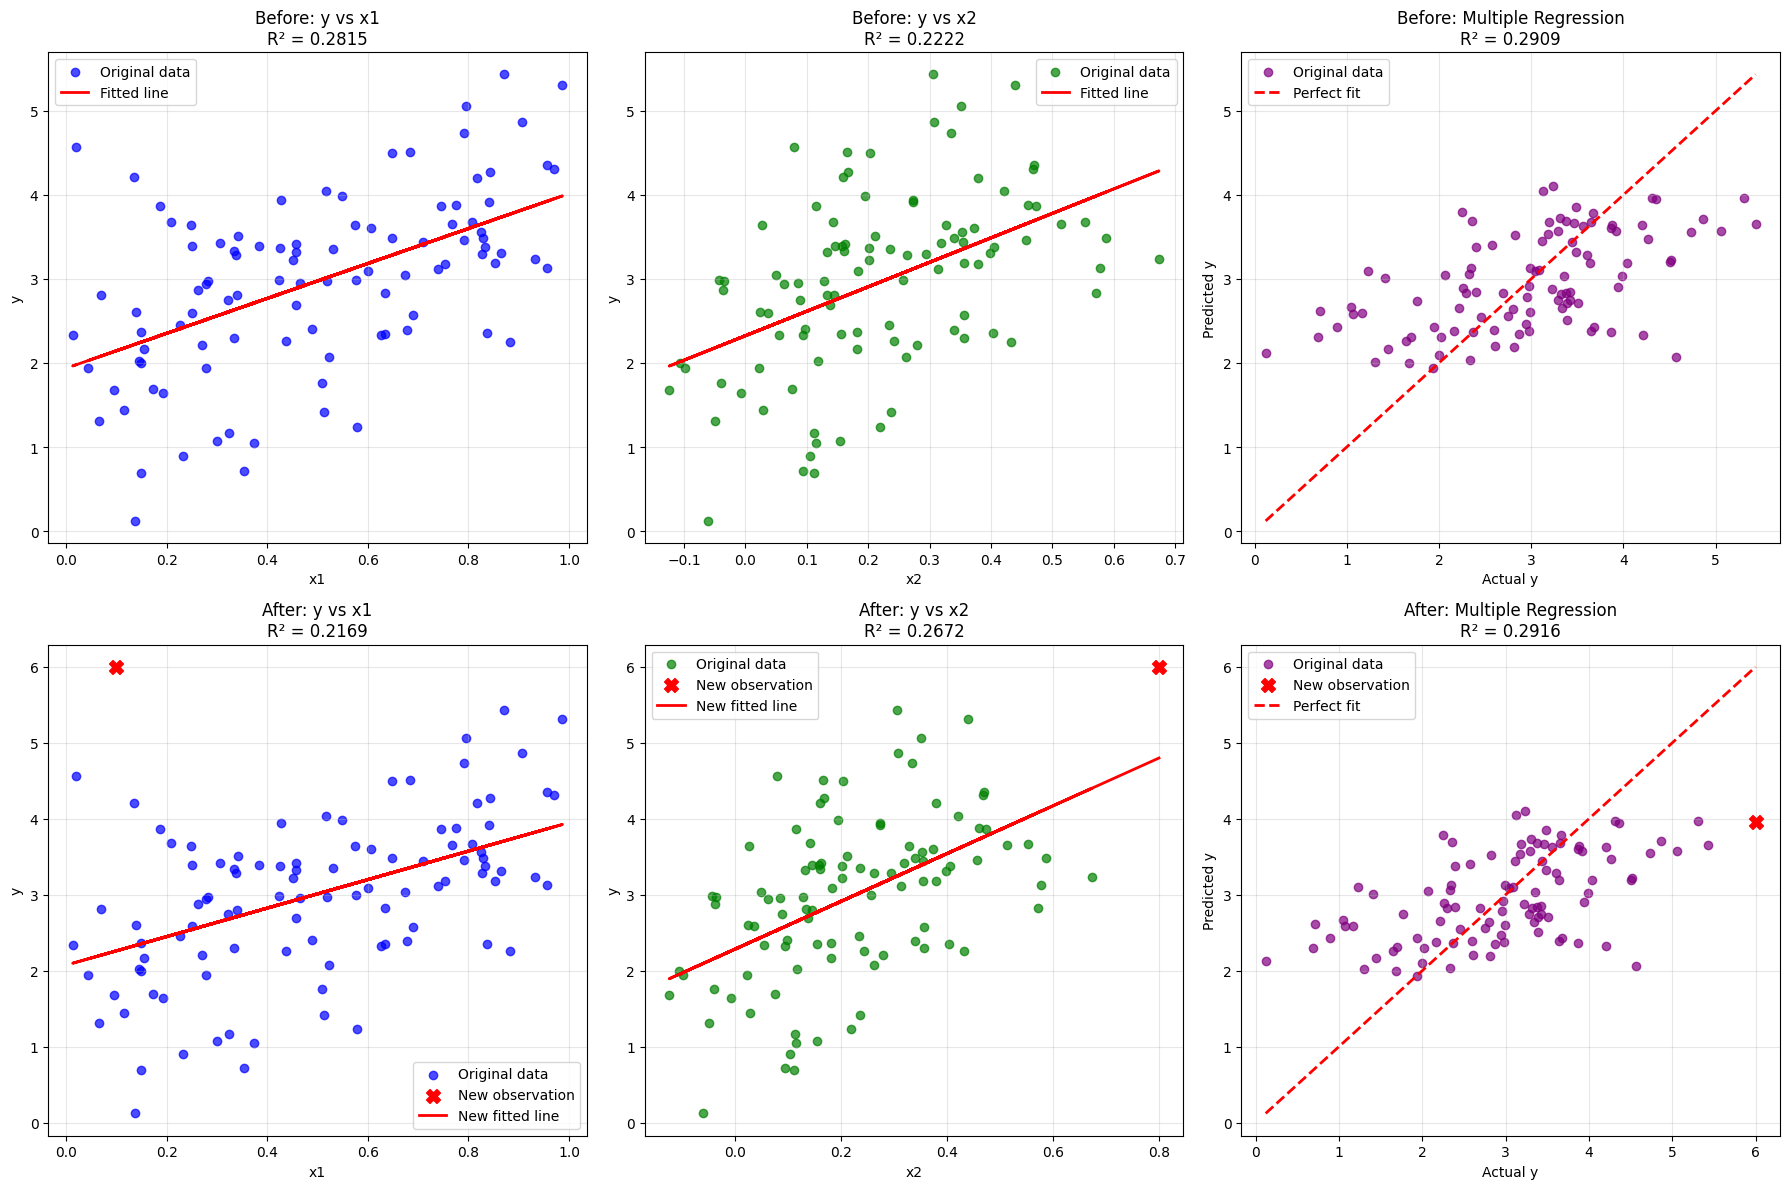


SUMMARY OF EFFECTS:
The new observation (red X) is:
- An OUTLIER because it has a large residual
- A HIGH LEVERAGE point because its x-values are in regions with few other observations
- INFLUENTIAL because it significantly changes the fitted regression lines
- Most influential in the x2-only model due to x2=0.8 being far from typical x2 values


In [12]:
# Visualize the effect of the new observation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Before adding the new observation
# Plot 1: x1 vs y (before)
axes[0,0].scatter(x1, y, alpha=0.7, color='blue', label='Original data')
axes[0,0].plot(x1, y_pred_x1, 'r-', linewidth=2, label='Fitted line')
axes[0,0].set_xlabel('x1')
axes[0,0].set_ylabel('y')
axes[0,0].set_title(f'Before: y vs x1\nR² = {r2_x1:.4f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: x2 vs y (before)
axes[0,1].scatter(x2, y, alpha=0.7, color='green', label='Original data')
axes[0,1].plot(x2, y_pred_x2, 'r-', linewidth=2, label='Fitted line')
axes[0,1].set_xlabel('x2')
axes[0,1].set_ylabel('y')
axes[0,1].set_title(f'Before: y vs x2\nR² = {r2_x2:.4f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Multiple regression fitted vs actual (before)
axes[0,2].scatter(y, y_pred_both, alpha=0.7, color='purple', label='Original data')
axes[0,2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect fit')
axes[0,2].set_xlabel('Actual y')
axes[0,2].set_ylabel('Predicted y')
axes[0,2].set_title(f'Before: Multiple Regression\nR² = {r2_both:.4f}')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Row 2: After adding the new observation
# Plot 4: x1 vs y (after)
axes[1,0].scatter(x1, y, alpha=0.7, color='blue', label='Original data')
axes[1,0].scatter([0.1], [6], color='red', s=100, marker='X', label='New observation', zorder=5)
axes[1,0].plot(x1_new, y_pred_x1_new, 'r-', linewidth=2, label='New fitted line')
axes[1,0].set_xlabel('x1')
axes[1,0].set_ylabel('y')
axes[1,0].set_title(f'After: y vs x1\nR² = {r2_x1_new:.4f}')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 5: x2 vs y (after)
axes[1,1].scatter(x2, y, alpha=0.7, color='green', label='Original data')
axes[1,1].scatter([0.8], [6], color='red', s=100, marker='X', label='New observation', zorder=5)
axes[1,1].plot(x2_new, y_pred_x2_new, 'r-', linewidth=2, label='New fitted line')
axes[1,1].set_xlabel('x2')
axes[1,1].set_ylabel('y')
axes[1,1].set_title(f'After: y vs x2\nR² = {r2_x2_new:.4f}')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Plot 6: Multiple regression fitted vs actual (after)
axes[1,2].scatter(y, y_pred_both, alpha=0.7, color='purple', label='Original data')
axes[1,2].scatter([6], [y_pred_both_new[-1]], color='red', s=100, marker='X', label='New observation', zorder=5)
axes[1,2].plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'r--', linewidth=2, label='Perfect fit')
axes[1,2].set_xlabel('Actual y')
axes[1,2].set_ylabel('Predicted y')
axes[1,2].set_title(f'After: Multiple Regression\nR² = {r2_both_new:.4f}')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSUMMARY OF EFFECTS:")
print("The new observation (red X) is:")
print("- An OUTLIER because it has a large residual")
print("- A HIGH LEVERAGE point because its x-values are in regions with few other observations")
print("- INFLUENTIAL because it significantly changes the fitted regression lines")
print("- Most influential in the x2-only model due to x2=0.8 being far from typical x2 values")